## Simple example of TuRBO-m

In [1]:
cd ..

/home/mattyshen/NNTuRBO


In [2]:
from nnturbo import NNTurboM
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

## Set up an optimization problem class

In [3]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

## Create a Turbo optimizer instance

In [8]:
turbo_m = NNTurboM(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=10,  # Number of initial bounds from an Symmetric Latin hypercube design
    max_evals=1000,  # Maximum number of evaluations
    n_trust_regions=5,  # Number of trust regions
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cuda",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
    prop=1.2,
    p=2,
    max_features=0.5
)

Using dtype = torch.float64 
Using device = cuda:0


# Run the optimization process

In [9]:
turbo_m.optimize()

TR-0 starting from: 36.3
TR-1 starting from: 28.51
TR-2 starting from: 20.99
TR-3 starting from: 32.9
TR-4 starting from: 33.35
50) New best @ TR-1: 16.71
70) New best @ TR-1: 16.66
80) New best @ TR-1: 9.465
180) New best @ TR-4: 3.689
updating feature probs
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 2. 1. 2. 2. 1. 1. 2. 1. 2.]
updating feature probs
[1. 2. 1. 2. 2. 1. 1. 2. 1. 2.]
[2. 3. 1. 3. 3. 1. 1. 2. 2. 2.]
updating feature probs
[2. 3. 1. 3. 3. 1. 1. 2. 2. 2.]
[3. 4. 1. 4. 4. 1. 1. 2. 3. 2.]
480) New best @ TR-0: 1.481
480) New best @ TR-4: 3.601
630) New best @ TR-0: 1.242
710) New best @ TR-4: 1.046
730) New best @ TR-0: 0.8053
790) TR-0 converged to: : 0.8053
old features for TR-0: [3 0 1 4 8]
new features for TR-0: [4 1 6 8 3]
790) TR-0 is restarting from: : 21.19
830) TR-4 converged to: : 0.8218
old features for TR-4: [1 3 4 7 9]
new features for TR-4: [0 5 1 4 3]
830) TR-4 is restarting from: : 13.22
updating feature probs
[3. 4. 1. 4. 4. 1. 1. 2. 3. 2.]
[3. 4. 2. 5. 5. 2. 1. 3.

In [10]:
turbo_m.feat_c

array([3., 4., 2., 5., 5., 2., 1., 3., 3., 2.])

## Extract all evaluations from Turbo and print the best

In [11]:
X = turbo_m.X  # Evaluated points
fX = turbo_m.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

Best value found:
	f(x) = 0.805
Observed at:
	x = [1.074 3.697 1.208 1.303 1.539 0.913 1.074 0.603 1.132 0.884]


## Plot the progress

TuRBO-5 converges to a solution close to the global optimum

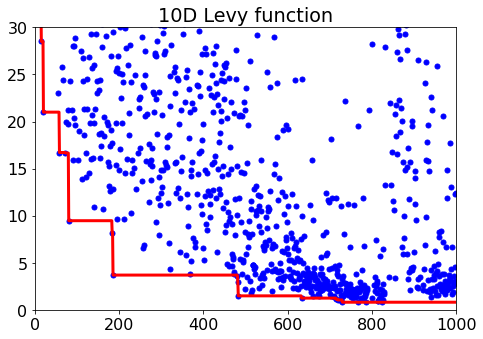

In [12]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()